In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC


df=pd.read_csv('/data/train.csv')
df_test=pd.read_csv('/data/test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

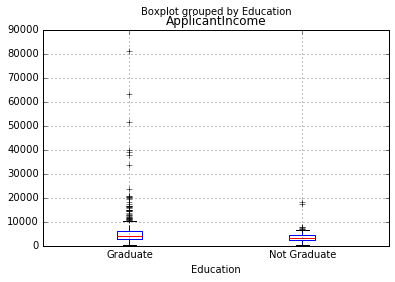

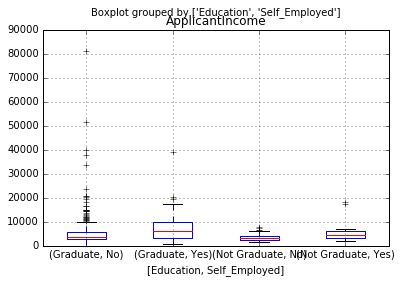

In [5]:
df.boxplot(column='ApplicantIncome', by='Education')
df.boxplot(column='ApplicantIncome', by=['Education','Self_Employed'])

In [6]:
df['Self_Employed'].fillna('No',inplace=True)

In [7]:
table=df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [8]:
df_test['Self_Employed'].fillna('No',inplace=True)

In [9]:
table1=df_test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fagee(x):
 return table1.loc[x['Self_Employed'],x['Education']]

In [10]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [13]:
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fagee, axis=1), inplace=True)

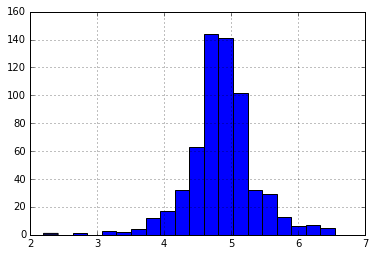

In [14]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

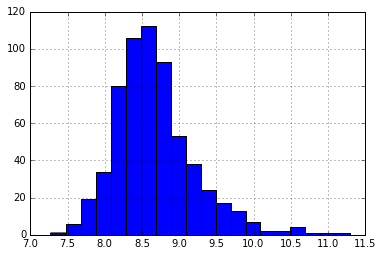

In [15]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

In [16]:
df['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
df['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('Yes')
df['Dependents']=df['Dependents'].fillna(0)

In [20]:
df_test['Gender']=df_test['Gender'].fillna('Male')
df_test['Dependents']=df_test['Dependents'].fillna(0)
df_test['TotalIncome']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

In [21]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [22]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
TotalIncome           0
dtype: int64

In [23]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
df_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
120.0      1
60.0       1
36.0       1
12.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(360.0)

In [27]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

df.drop(['Property_Area'],axis=1,inplace=True)
df_test.drop(['Property_Area'],axis=1,inplace=True)

In [28]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [29]:
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
TotalIncome          0
dtype: int64

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,4.948760,6000.0,8.699515


In [31]:
df['EMI']=(df['LoanAmount']*1000*(0.0083)*(1.0083)**df['Loan_Amount_Term'])/((1+0.0083)**df['Loan_Amount_Term']-1)
df['ratio']=df['EMI']/df['TotalIncome']
df['ratio']

0      0.194393
1      0.183797
2      0.192416
3      0.212415
4      0.205535
5      0.242924
6      0.215871
7      0.249440
8      0.265610
9      0.128204
10     0.156983
11     0.219662
12     0.156475
13     0.212458
14     0.094038
15     0.220863
17     0.189376
18     0.238028
19     0.164887
20     0.118747
21     0.237914
22     0.224907
23     0.185455
25     0.174740
26     0.211210
27     0.182696
28     0.212286
29     0.179932
31     0.204363
32     0.197590
         ...   
582    0.099451
584    0.271459
585    0.391576
586    0.238178
587    0.282786
588    0.173082
589    0.340093
590    0.093580
591    0.328811
592    0.272938
593    0.212665
594    0.141067
595    0.250999
596    0.221527
597    0.257671
598    0.158016
599    0.290530
601    0.238420
602    0.196302
603    0.188585
604    0.361508
605    0.195410
606    0.256456
607    0.254381
608    0.182282
609    0.214130
610    0.104448
611    0.266215
612    0.215684
613    0.253816
Name: ratio, dtype: floa

In [32]:


df_test['EMI']=(df_test['LoanAmount']*1000*(0.0083)*(1.0083)**df_test['Loan_Amount_Term'])/((1+0.0083)**df_test['Loan_Amount_Term']-1)
df_test['ratio']=df_test['EMI']/df_test['TotalIncome']
df_test['ratio']

0      0.168196
1      0.240826
2      0.267530
4      0.208242
5      0.237948
6      0.231817
7      0.331277
8      0.197656
9      0.224121
10     0.254660
11     0.382837
13     0.119269
14     0.232431
15     0.202179
16     0.233262
17     0.267545
18     0.153066
19     0.224771
20     0.119674
21     0.144121
22     0.225982
23     0.290378
24     0.259345
25     0.053935
27     0.213795
29     0.251728
30     0.264715
31     0.237520
32     0.268515
33     0.251665
         ...   
332    0.235973
333    0.209878
334    0.088294
335    0.167635
337    0.270336
338    0.146503
339    0.212553
340    0.175481
341    0.198319
342    0.246578
343    0.148871
344    0.224457
345    0.272859
346    0.217144
347    0.213470
348    0.246089
349    0.443869
350    0.256320
352    0.141717
353    0.118085
354    0.307834
355    0.195440
356    0.129810
357    0.209908
359    0.199403
361    0.195192
362    0.170812
363    0.206659
365    0.186919
366    0.114208
Name: ratio, dtype: floa

In [33]:
from sklearn import preprocessing
var_mod_train = ['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Loan_Status']
var_mod_test= ['Gender','Married','Dependents','Education','Self_Employed']
le = preprocessing.LabelEncoder()
lx=preprocessing.LabelEncoder()
for i in var_mod_train:
    df[i] = le.fit_transform(df[i].astype('str'))
for j in var_mod_test:
    df_test[j] = lx.fit_transform(df_test[j].astype('str'))

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,ratio
0,0,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,1,4.867534,5849.0,8.674026,1137.002292,0.194393
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,1119.509949,0.183797
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,4.189655,3000.0,8.006368,577.247317,0.192416
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,4941.0,8.505323,1049.540577,0.212415
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,4.948760,6000.0,8.699515,1233.210178,0.205535


In [35]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,ratio
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,5720,962.078862,0.168196
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,4576,1102.017606,0.240826
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,6800,1819.203666,0.267530
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,3276,682.201375,0.208242
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,5587,1329.418064,0.237948


In [36]:
x_train= df.drop(['Loan_Status','Loan_ID','LoanAmount_log','TotalIncome_log'], axis=1)

y_train=df['Loan_Status']

x_test=df_test.drop(['Loan_ID'],axis=1)

In [37]:
x_train.shape, y_train.shape, x_test.shape

((564, 13), (564,), (338, 13))

In [38]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,ratio
0,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,5849.0,1137.002292,0.194393
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,6091.0,1119.509949,0.183797
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,3000.0,577.247317,0.192416
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,4941.0,1049.540577,0.212415
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,6000.0,1233.210178,0.205535


In [39]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [40]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,ratio
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,5720,962.078862,0.168196
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,4576,1102.017606,0.240826
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,6800,1819.203666,0.267530
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,3276,682.201375,0.208242
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,5587,1329.418064,0.237948


In [41]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(x_train, y_train)

pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

1.0

In [42]:
svc = SVC()
svc.fit(x_train, y_train)
yy_pred = svc.predict(x_test)
svc.score(x_train, y_train)

1.0

In [43]:
pred=lx.inverse_transform(pred)

In [44]:
submission = pd.DataFrame({
        "Loan_ID": df_test["Loan_ID"],
        "Loan_Status": pred
    })
submission.to_csv('/Loan prediction/Sample_Submission.csv', index=False)